<a href="https://colab.research.google.com/github/lakshmipriyaanand/nn-zero-to-hero-andrej-notes/blob/main/makemore_part1_bigrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Importing dataset

#words = open('names.txt','r').read().splitlines() -- If dataset is in local machine

#Importing dataset from our Github repo
import requests
url = "https://raw.githubusercontent.com/lakshmipriyaanand/makemore_LP/refs/heads/main/names.txt"
data = requests.get(url).text #downloads the file from github
words = data.splitlines() #splits it into a list of lines, just like reading a local file
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [53]:
#Basic exploration

print("Length: ",len(words))
print("Minimum word length : ", min(len(w) for w in words))
print("Maximum word length : ", max(len(w) for w in words))

Length:  32033
Minimum word length :  2
Maximum word length :  15


#Exploring bigrams in the dataset

bigrams are just 2 characters in a row

In [54]:
for w in words[:1]:
  for a,b in zip(w,w[1:]): #Basic zip functionality testing
    print (a,b)

e m
m m
m a


In [55]:
w

'emma'

In [56]:
w[1:]

'mma'

In [57]:
list(w)

['e', 'm', 'm', 'a']

In [58]:
for w in words[:3]:
  chs = ['<S>'] +list(w) + ['<E>'] #Here S is the bigram of the starting character 'a' and E is the bigram of ending character 'a'
  for ch1,ch2 in zip(chs,chs[1:]):
    print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [59]:
#It’s creating a frequency dictionary of letter pairs.
b = {}   # an empty dictionary to store bigram counts

for w in words:   # go through each word in the dataset
  chs = ['<S>'] + list(w) + ['<E>']  # break the word into letters, adding start and end markers

  for ch1, ch2 in zip(chs, chs[1:]):  # pair up each character with the next one
    bigram = (ch1, ch2)   # store the pair as a tuple, e.g., ('l','a')
    b[bigram] = b.get(bigram, 0) + 1  # count how many times each bigram appears

In [60]:
#sorted(b.items(),key = lambda kv : -kv[1]) #Sorts the b.items in descending order based on key value ('-' is for descending)

Since we found out the value, we are planning to store this information in a 2d array where the rows will be the 1st character in bigram ad columns will be the 2nd character. Each entry will tell us how often the first character follows the 2nd character in the dataset.

Here we'll use **Pytorch** to represent this

In [61]:
import torch

#Basic torch functionality check

In [62]:
a = torch.zeros((3,5),dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [63]:
a[1,3]=1 #Accessing and changing value by index
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [64]:
#Incrementing the value
a[1,3]+=1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

# For our problem statement - Counting bigrams in a 2D torch tensor ("training the model" )

In [65]:
N = torch.zeros((28, 28), dtype=torch.int32)

What we have is values of characters/strings which we can't access much by index in a 2d array. So we are creating a sort of lookup table from characters to integers.

In [66]:
chars = sorted(list(set(''.join(words))))
#Joins all the words and set prevents duplication and it is converted to list and is sorted resulting in a to z
stoi = {s:i+1 for i,s in enumerate(chars)} #enumerate results in value: index value.. starts from a= 0 so z= 25
stoi["."]=0
itos = {i:s for s,i in stoi.items()} #Reversing the value so that it looks like index:string

In [67]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [68]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [69]:
for w in words:
  chs = ['.'] +list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] +=1

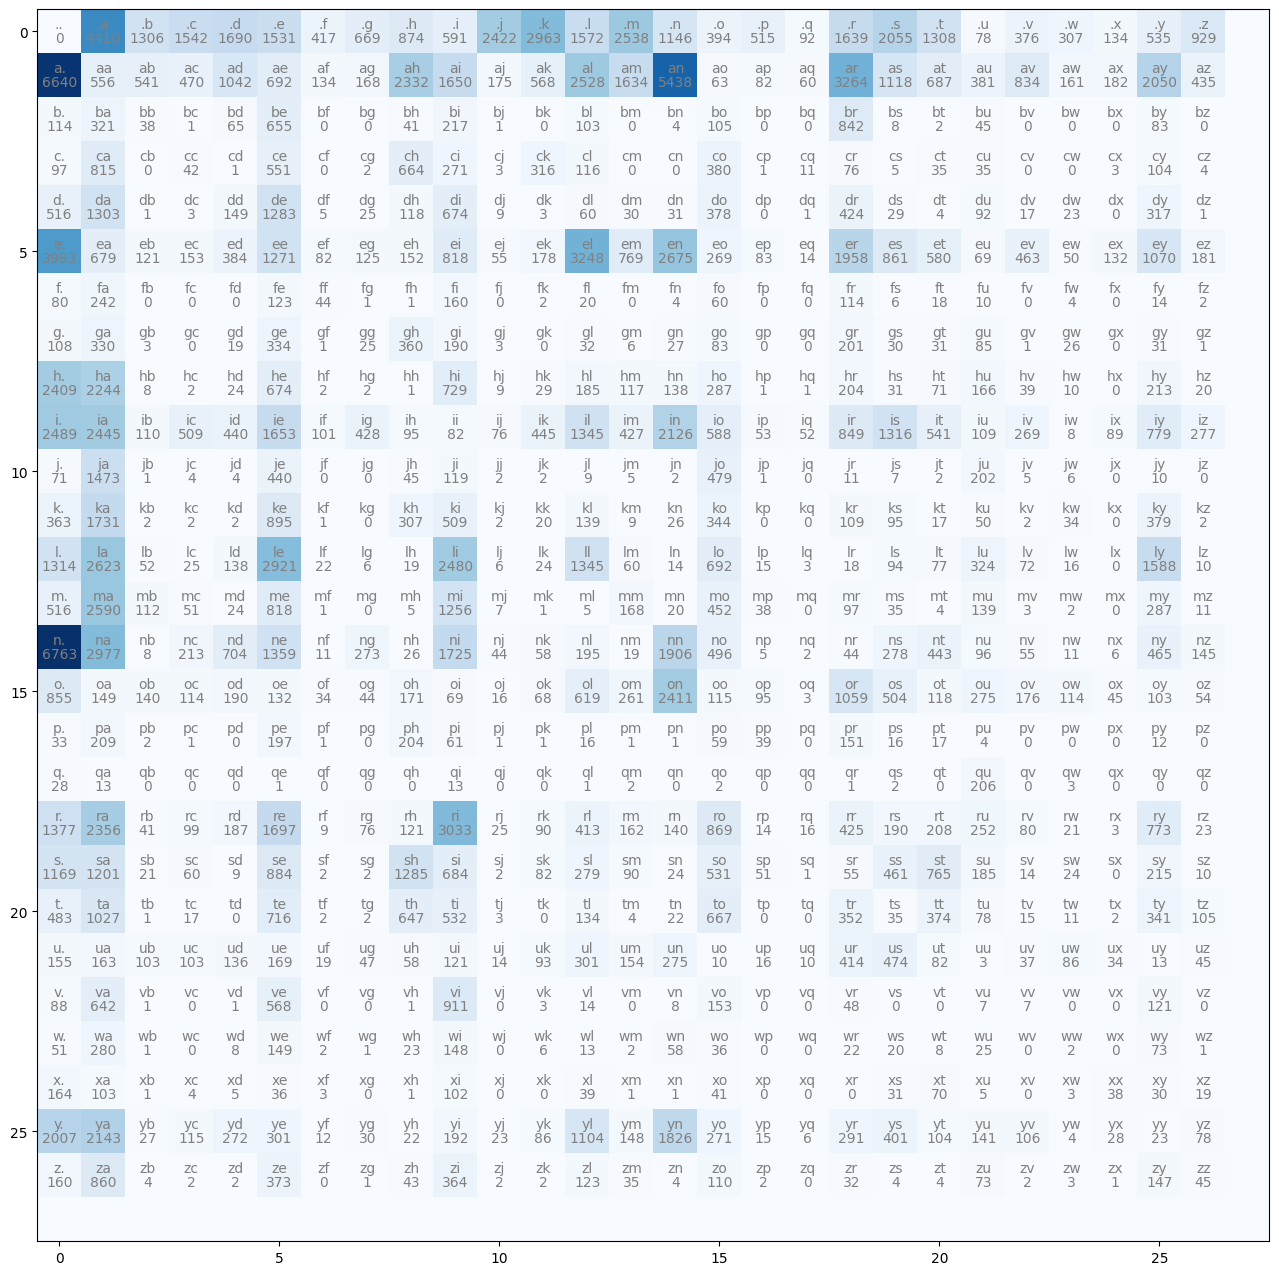

In [70]:
#visualizing using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
#plt.axis('off');

In [71]:
N[0] #Creating 1D array of values of 1st row

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [72]:
#Finding the probability distribution
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

#Now we are going to do Sampling from this distribution
For that we use torch.multinomial

To make this sampling generalistic, we are going to use 'generator' object in pytorch

In [73]:
#Create a new random number generator and fix its randomness so everything that uses it is reproducible.Manual seed ensured it gives the same random number everytime it runs
#g = torch.Generator().manual_seed(2147483647)
#p = torch.rand(3,generator = g) #Generated 3 random numbers with generator output from g
#p = p / p.sum() #Probability finder
#p

#Output : 0.6064 means - the probability of the first element in the tensor is 60% so 60%
# We expect 30% of the  element to be 1
# We expect around 10% of the element to be 2

In [74]:
#torch.multinomial(p, num_samples=20, replacement=True, generator=g)

#Eg: out of these 20 samples, we expect 20% will be 0, 30% to be 1, 10% to be 2

In [75]:
#Word generator
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p / p.sum()
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #Index
itos[ix] #Value of the index ix



'c'

In [76]:
p.shape

torch.Size([28])

In [77]:
P = (N+1).float() #Model smoothening (adding 1) just coz sometimes few might have 0 so to avoid them.
P =P/ P.sum(1, keepdims=True) #Probability
g = torch.Generator().manual_seed(2147483647)

In [78]:
for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix] #Assigns the probability row of the current character
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() #Randomly picks next character's index to p (Highest probability will be preferred)
    out.append(itos[ix]) #Converts the chosen index back to the character
    if ix == 0:
      break
  print(''.join(out))

cava.
ayamaijowy.
aianeta.
rl.
miryndardyrioma.


# Above has individual probability values, we need to see what's the probability of the model in a single number, that's where we use
'Maximum Likelihood Estimation'.

From the above example, the product of all the above values will be our Likelihood. Since our values are very low, their product will be too low too.. That's when our 'Log Likelihood'.  We just have to take the log of the product of these likelihood.

log(a*b*c) = log(a) + log(b) + log(c)
Negative Log likelihood is inverted log likelihood. Lowest it can go is '0', more higher the value, the **worse** the predictions are. It is similar to Avg of nll. lower the value, better it is.

# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
- equivalent to maximizing the log likelihood (because log is monotonic)
- equivalent to minimizing the negative log likelihood
- equivalent to minimizing the average negative log likelihood


In [79]:
#Loss function ( negative log livelihood of the data under our model) - How well our model performs
log_likelihood=0.0
n=0
#for w in words[:3]: #only for 1st 3 words
for w in ["andrejq"]:
  chs = ['.'] +list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1] #1st character
    ix2 = stoi[ch2] #2nd character
    prob = P[ix1,ix2] #Finds the prob of ix1,ix2 ---- Likelihood (Main goal: Maximize)
    logprob= torch.log(prob) #Log of the prob for each ix1,ix2 combo -- Log likelihood (Main goal: Maximize)
    log_likelihood +=logprob # Sum of all logprob
    n+=1 #appending number of characters
    print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

    nll = - log_likelihood #Declaring negative log likelihood. (Main goal = Minimize)

print(f'{log_likelihood =}')
print(f'{nll =}')
print(f'{nll/n}') #Average of nll (Main goal = Minimize)

.a:0.1376 -1.9835
an:0.1604 -1.8302
nd:0.0384 -3.2595
dr:0.0769 -2.5648
re:0.1334 -2.0144
ej:0.0027 -5.9004
jq:0.0003 -7.9821
q.:0.0967 -2.3365
log_likelihood =tensor(-27.8713)
nll =tensor(27.8713)
3.483914852142334


We'll check NLL and lower its value, better the model is

# Neural Network approach

Till now we have seen bi-gram model, now we'll see the neural network approach.


Same output like bi-gram but, it used to do things differently.

Neural network is still a background character level language model, so it receives a single character as an input, and then , there's a NN with some weights or paramaters and its going to give the output as 'probability distribution' over the next character in a sequence, i.e it is going to make guesses as to what it is likely to follow this character that was input to the model. In addition to that, we are going to evaluate any setting of the parameters of the neural network becoz we have loss function and NLL.

We are also going to use labels to identify the second/next character so it assigns the probability value which helps us to understand how high the probability is.

So we are going to use Gradient-based optimization since we have loss function and we need to minimise it by finetuning the weights so the NN is correctly predicting the probabilities for next character

In [80]:
#Step 1: Create training set for all bi-grams(x,y)

xs,ys=[],[] #xs-inputs , ys-targets

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1,ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


torch.tensor -  same as np.array. gives autograd support . There are 2 torch.tensor and torch.Tensor. tensor infers to dtype automatically whereas Tensor assigns it as float

In [81]:
xs

tensor([ 0,  5, 13, 13,  1])

In [82]:
ys

tensor([ 5, 13, 13,  1,  0])

In [83]:
#Performing encoding by one-hot encoding
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [84]:
xenc.shape

torch.Size([5, 27])

In [85]:
xenc.dtype

torch.float32

In [86]:
#Creating 'Neural net' one linear layer of neurons implemented with matrix multiplication
W = torch.randn((27,27)) #Initializing weights and resultant W will be in column value format
xenc @ W # '@' is matrix multiplication

tensor([[ 5.3776e-01, -1.7916e-01,  5.9056e-01, -5.7942e-01,  5.2415e-01,
         -1.0881e+00,  2.8491e-01, -1.4578e-01,  8.0068e-01, -2.7296e-01,
         -5.3587e-01, -3.0378e-01,  4.1305e-01, -1.7174e+00, -6.9553e-01,
         -7.7504e-01, -8.8866e-01,  6.5860e-01,  1.4257e+00,  1.2181e+00,
          1.0907e+00, -7.8254e-01, -1.9692e+00, -3.5546e-01,  1.1807e-01,
          2.2807e-02,  4.3594e-01],
        [-6.6430e-01,  1.0608e+00,  1.3245e+00, -2.8570e+00, -1.8953e+00,
          1.5655e-01,  7.6579e-01,  2.2757e-01, -1.2144e+00,  2.4955e+00,
         -1.3939e-01,  1.3357e+00,  9.8537e-01,  2.8790e+00, -1.8372e+00,
         -5.7566e-01, -1.5934e+00,  1.8605e+00,  3.3184e-01,  2.1281e+00,
          1.7920e-01,  7.5612e-01, -6.9016e-01,  3.3884e-01,  2.8717e-01,
         -9.5122e-01, -2.5774e-01],
        [-1.8431e-01, -3.3232e-01, -1.9042e+00,  6.5628e-01, -6.2347e-01,
          1.2806e+00,  4.2969e-01,  8.5207e-02,  2.4370e-03, -7.0664e-01,
          7.2479e-01, -3.7192e-01,  2.20

In [87]:
#Now we need to find the probability
logits = xenc @ W # log-counts
counts = logits.exp() # exponential.     #exp(x) is the probability formula for this
probs = counts / counts.sum(1, keepdims=True) # we are just doing normalisation of 'counts' so we get probability distribution
probs

tensor([[0.0504, 0.0246, 0.0532, 0.0165, 0.0498, 0.0099, 0.0392, 0.0255, 0.0656,
         0.0224, 0.0172, 0.0217, 0.0445, 0.0053, 0.0147, 0.0136, 0.0121, 0.0569,
         0.1226, 0.0996, 0.0877, 0.0135, 0.0041, 0.0206, 0.0331, 0.0301, 0.0456],
        [0.0069, 0.0388, 0.0506, 0.0008, 0.0020, 0.0157, 0.0289, 0.0169, 0.0040,
         0.1630, 0.0117, 0.0511, 0.0360, 0.2392, 0.0021, 0.0076, 0.0027, 0.0864,
         0.0187, 0.1129, 0.0161, 0.0286, 0.0067, 0.0189, 0.0179, 0.0052, 0.0104],
        [0.0137, 0.0118, 0.0024, 0.0317, 0.0088, 0.0591, 0.0252, 0.0179, 0.0165,
         0.0081, 0.0339, 0.0113, 0.1489, 0.0139, 0.0067, 0.0205, 0.2637, 0.0465,
         0.0326, 0.0257, 0.0520, 0.0258, 0.0274, 0.0103, 0.0156, 0.0640, 0.0064],
        [0.0137, 0.0118, 0.0024, 0.0317, 0.0088, 0.0591, 0.0252, 0.0179, 0.0165,
         0.0081, 0.0339, 0.0113, 0.1489, 0.0139, 0.0067, 0.0205, 0.2637, 0.0465,
         0.0326, 0.0257, 0.0520, 0.0258, 0.0274, 0.0103, 0.0156, 0.0640, 0.0064],
        [0.0273, 0.0173,

In [88]:
probs[0] #how unlikely these 27 characters are to come to next

tensor([0.0504, 0.0246, 0.0532, 0.0165, 0.0498, 0.0099, 0.0392, 0.0255, 0.0656,
        0.0224, 0.0172, 0.0217, 0.0445, 0.0053, 0.0147, 0.0136, 0.0121, 0.0569,
        0.1226, 0.0996, 0.0877, 0.0135, 0.0041, 0.0206, 0.0331, 0.0301, 0.0456])

In [89]:
probs.shape

torch.Size([5, 27])

# Summary !

In [90]:
xs

tensor([ 0,  5, 13, 13,  1])

In [91]:
ys

tensor([ 5, 13, 13,  1,  0])

In [92]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647) # for generating the same value everytime we generate randomly
W = torch.randn((27, 27), generator=g)

In [93]:
#Forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

🧠 What does softmax do?

➡️ It converts raw scores (any numbers) into
✅ probabilities
✅ that are positive
✅ and sum to 1

Softmax is used because:
✅ Converts network output → probability
✅ Needed for classification and training
✅ Makes comparison between classes fair

In [94]:
probs.shape

torch.Size([5, 27])

In [95]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

We can see that we have trained this on only one word (emma) and the Average NLL is 3.769 which is very high loss. So its better we need to optimize their weights

# Optimization ! Yayyy

Now since we need to optimize their weights 'W' we are using gradient based optimization here

Reference to micrograd: We optimized it by Forward pass (found ypred and loss (Sum of all losses))> Backward pass (initialised parameter and did .backward() using .grad()) > Update (updated parameter by particular value like 0.01 or 0.1))

In [96]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [97]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [98]:
# gradient descent
for k in range(1):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7686190605163574


# Notes:

* ### One-hot encoding actually just selects a row of the next Linear layer's weight matrix:
  - Eg: When we run bi-gram model, only the first letter is taken and it is considered as a index of the row in that matrix(heatmap) we created and that row gave us the highest probability distribution for the next character.

  - So similarly we take xenc (5 x 27) as index - and then multiple them with W (27 x 27) so it becomes logits(appropriate row for W). W is same as the array in bigram so W * xenc gives us the Matrix same as bigram

* ### Model smoothing as regularization loss:
  - Remember we added N+1 to fake and smooth out the value if value is 0 for probability and make it more uniform distributions. If we increase the count , probabilty will be more and more uniform.

  - When W's are in same value with each other(Eg:0) then its exponential will be 1 and probabilty will be completely uniform so trying to incentivize W to be near to zero is basically equivalent to "Label Smoothing" so the more we are going to incentivize the loss function, the more smooth the distribution will be. So this brings to something called regularisation where we can augment the loss function by introducing a small component that we call a regularization loss '(W**2).mean()' to loss calculation.
  
  - So if you see that we have 2 components in finding loss. First part tries to make all the probabilites work out and our additional component that simultaneously tries to make all our W's to 0 becoz if W's are non-zero we feel a loss.

  - So, the strength of regularization depends upon the amount of value we add here 'N+1' adding a lot more counts here, responds to increasing step size in loss(0.01), Becoz the more you increase it, the more the second part of the formula starts dominating the first part. Weights will be unable to grow more becoz as they grow, they accumulate way too much loss and will be in uniform predictions.

In [99]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


texzmkloglquszipczktxhkmpmzistttwinmlgdukzka.
zr.
rocxtpucjwtsc.
gmtokmxczisqytxugkwpt.
dajkkluydjmscdgu.
